# Gradio

Gradio is an open-source Python library that allows you to quickly and easily create customizable, interactive interfaces for your machine learning models.

In [1]:
!pip install -qqq --progress-bar off gradio datasets evaluate transformers[sentencepiece]
!apt-get -qq install tree >/dev/null 2>&1

  Preparing metadata (setup.py) ... done


In [2]:
import gradio as gr

## Hello world project

## Interface

https://www.gradio.app/docs/interface

Interface(fn, inputs, outputs, ...)
- fn: the prediction function that is wrapped by the Gradio interface. This function can take one or more parameters and return one or more values
- inputs: the input component type(s). Gradio provides many pre-built components such as"image" or "mic".
- outputs: the output component type(s). Again, Gradio provides many pre-built components e.g. "image" or "label".

In [3]:
import gradio as gr

def greet(name):
    return "Hello " + name

demo = gr.Interface(fn=greet,
                    inputs="text",
                    outputs="text"
                    )

demo.launch()

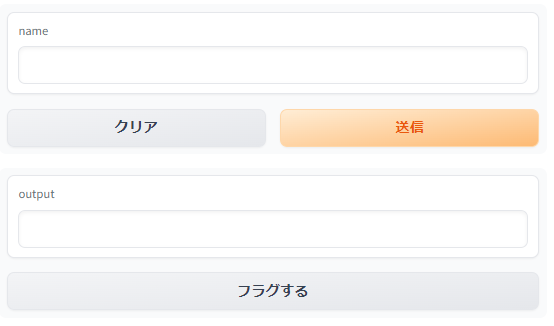

- title: you can give a title to your demo

- description: you can give a description (in text, Markdown, or HTML) for the interface.

- article: you can also write an expanded article (in text, Markdown, or HTML), it appears below the input and output components.

- theme: don’t like the default colors? Set the theme to use one of default, huggingface, grass, peach. You can also add the dark- prefix, e.g. dark-peach for dark theme (or just dark for the default dark theme).

- examples: example inputs for the function. These appear below the UI components and can be used to populate the interface. These should be provided as a nested list, in which the outer list consists of samples and each inner list consists of an input corresponding to each input component.

- live: if you want to make your demo “live”, meaning that your model reruns every time the input changes, you can set live=True.

In [4]:
title = "title: Ask Rick a Question"
description = """
description: The bot was trained to answer questions based on Rick and Morty dialogues. Ask Rick anything!
<img src="https://huggingface.co/spaces/course-demos/Rick_and_Morty_QA/resolve/main/rick.png" width=200px>
"""

article = "article: Check out [the original Rick and Morty Bot](https://huggingface.co/spaces/kingabzpro/Rick_and_Morty_Bot) that this demo is based off of."

gr.Interface(
    fn=predict,
    inputs="textbox",
    outputs="text",
    title=title,
    description=description,
    article=article,
    examples=[["What are you doing?"], ["Where should we time travel to?"]],
).launch()

Theme

https://huggingface.co/spaces/Kritdikoon/theme-gallery

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name

demo = gr.Interface(fn=greet,inputs="text",outputs="text",
                    theme='nuttea/Softblue')

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

theme='freddyaboulton/dracula_revamped'

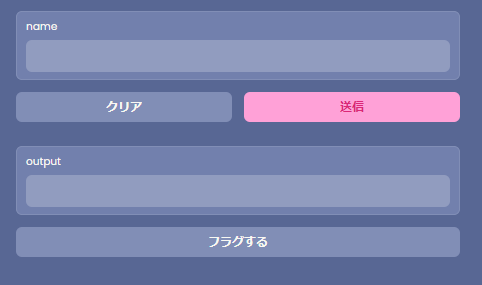

theme='HaleyCH/HaleyCH_Theme'

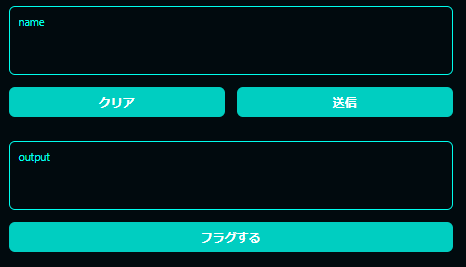

theme='finlaymacklon/smooth_slate'

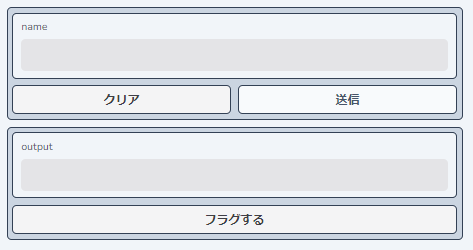

theme='nuttea/Softblue'

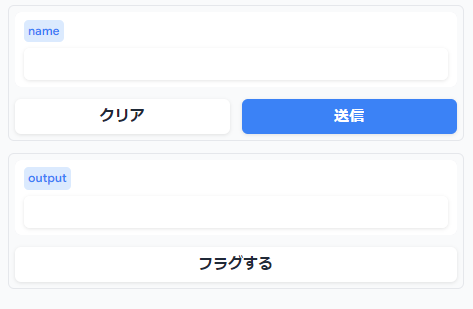

 title, description, article, examples

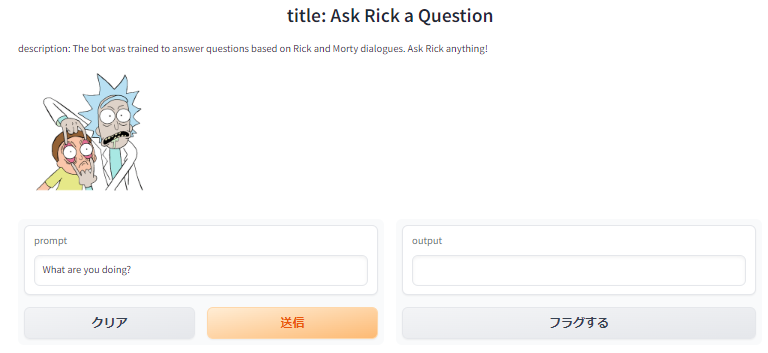

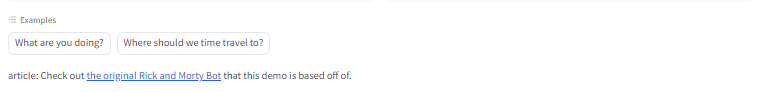

### launch
- inline - whether to display the interface inline on Python notebooks.
- inbrowser - whether to automatically launch the interface in a new tab on the default browser.
- share - share=True whether to create a publicly shareable link from your computer for the interface. Kind of like a Google Drive link!

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name

demo = gr.Interface(fn=greet,
                    inputs="text",
                    outputs="text"
                    )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bf1777cafa7caad03f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bf1777cafa7caad03f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

### gr.load()

In [ ]:
import gradio as gr

title = "GPT-J-6B"
description = "Gradio Demo for GPT-J 6B, a transformer model trained using Ben Wang's Mesh Transformer JAX. 'GPT-J' refers to the class of model, while '6B' represents the number of trainable parameters. To use it, simply add your text, or click one of the examples to load them. Read more at the links below."
article = "<p style='text-align: center'><a href='https://github.com/kingoflolz/mesh-transformer-jax' target='_blank'>GPT-J-6B: A 6 Billion Parameter Autoregressive Language Model</a></p>"

gr.load(
    "huggingface/EleutherAI/gpt-j-6B",
    inputs=gr.Textbox(lines=5, label="Input Text"),
    title=title,
    description=description,
    article=article,
).launch()

<ipython-input-4-8467c867169f>:7: GradioDeprecationWarning: gr.Interface.load() will be deprecated. Use gr.load() instead.
  gr.Interface.load(


Fetching model from: https://huggingface.co/EleutherAI/gpt-j-6B
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

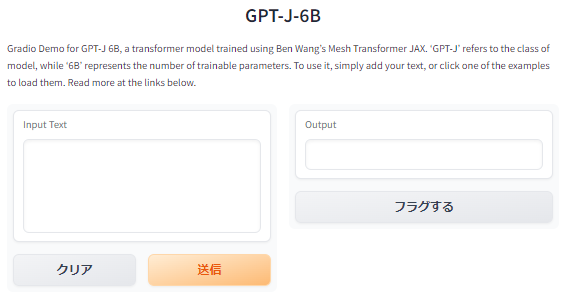

## Input

### Textbox
- label
- placeholder
- lines

In [ ]:
import gradio as gr


def greet(name):
    return "Hello " + name


# We instantiate the Textbox class
textbox = gr.Textbox(label="Type your name here:",
                     placeholder="jingwora",
                     lines=2)

gr.Interface(fn=greet,
             inputs=textbox,
             outputs="text"
             ).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

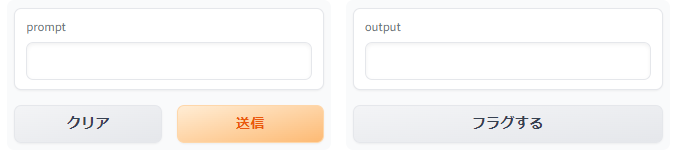

### Audio

In [ ]:
import numpy as np
import gradio as gr

def reverse_audio(audio):
    sr, data = audio
    reversed_audio = (sr, np.flipud(data))
    return reversed_audio

mic = gr.Audio(source="microphone",
               type="numpy",
               label="Speak here...")
gr.Interface(fn=reverse_audio,
             inputs=mic,
             outputs="audio"
             ).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

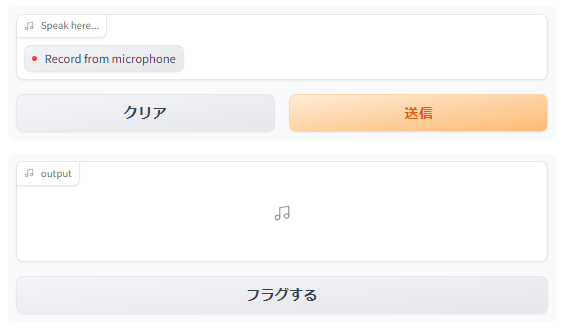

### multiple inputs
- Dropdown
- Slider

In [ ]:
import numpy as np
import gradio as gr

notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]


def generate_tone(note, octave, duration):
    sr = 48000
    a4_freq, tones_from_a4 = 440, 12 * (octave - 4) + (note - 9)
    frequency = a4_freq * 2 ** (tones_from_a4 / 12)
    duration = int(duration)
    audio = np.linspace(0, duration, duration * sr)
    audio = (20000 * np.sin(audio * (2 * np.pi * frequency))).astype(np.int16)
    return (sr, audio)


gr.Interface(
    fn=generate_tone,
    inputs=[
        gr.Dropdown(notes, type="index"),
        gr.Slider(minimum=4, maximum=6, step=1),
        gr.Textbox(type="text",
                   value=1,
                   label="Duration in seconds"),
        ],
    outputs="audio",
    ).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

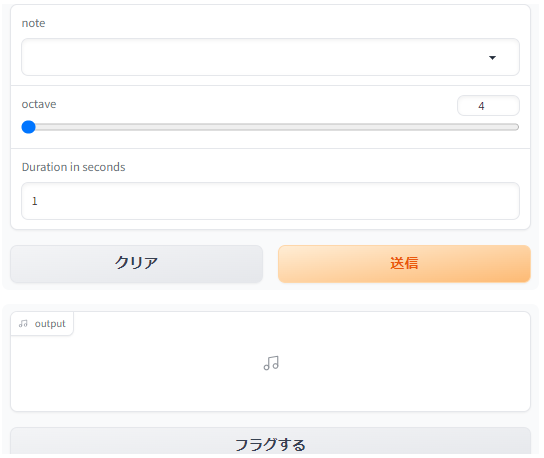

speech-recognition

In [ ]:
from transformers import pipeline
import gradio as gr

model = pipeline("automatic-speech-recognition")


def transcribe_audio(mic=None, file=None):
    if mic is not None:
        audio = mic
    elif file is not None:
        audio = file
    else:
        return "You must either provide a mic recording or a file"
    transcription = model(audio)["text"]
    return transcription

gr.Interface(
    fn=transcribe_audio,
    inputs=[
        gr.Audio(source="microphone",
                 type="filepath",
                 optional=True),
        gr.Audio(source="upload",
                 type="filepath",
                 optional=True),
        ],
    outputs="text",
    ).launch()

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-c5ceb51d38b6>:20: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Audio(source="microphone",
<ipython-input-37-c5ceb51d38b6>:23: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Audio(source="upload",


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

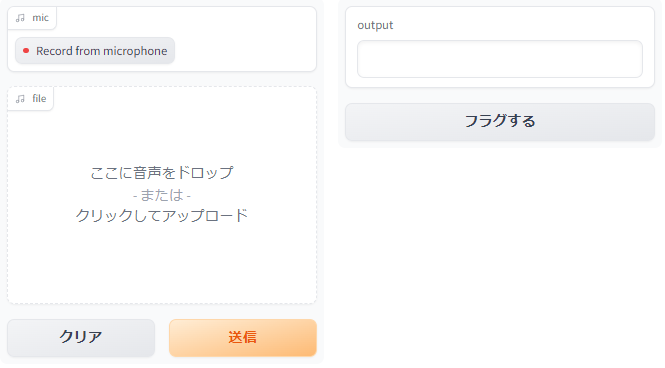

## Function

### pipeline

In [ ]:
import gradio as gr
from transformers import pipeline

model = pipeline("text-generation")

def predict(prompt):
    completion = model(prompt)[0]["generated_text"]
    return completion

gr.Interface(fn=predict,
             inputs="text",
             outputs="text"
             ).launch()

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

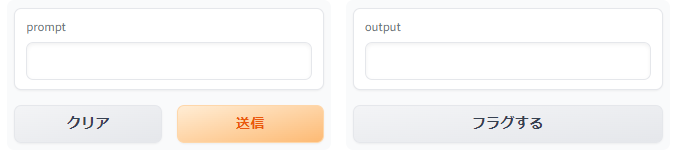

In [ ]:
model.model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
model.tokenizer

GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True)

## Advanced

### session state
- Pass in an extra parameter into your function, which represents the state of the interface.
- At the end of the function, return the updated value of the state as an extra return value.
- Add the ‘state’ input and ‘state’ output components when creating your Interface.

- allow_screenshot: determines whether or not users are allowed to take screenshots of the interface during their interaction with the model. (True/False)
- allow_flagging: controls whether users are allowed to flag content during their interaction with the model. ['auto', 'manual', 'never']

In [ ]:
import random

import gradio as gr


def chat(message, history):
    history = history or []
    if message.startswith("How many"):
        response = random.randint(1, 10)
    elif message.startswith("How"):
        response = random.choice(["Great", "Good", "Okay", "Bad"])
    elif message.startswith("Where"):
        response = random.choice(["Here", "There", "Somewhere"])
    else:
        response = "I don't know"
    history.append((message, response))
    return history, history


demo = gr.Interface(
    chat,
    inputs=["text", "state"],
    outputs=["chatbot", "state"],
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### interpretation

In [ ]:
import requests
import tensorflow as tf

import gradio as gr

inception_net = tf.keras.applications.MobileNetV2()  # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")


def classify_image(inp):
    inp = inp.reshape((-1, 224, 224, 3))
    inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
    prediction = inception_net.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}


image = gr.Image(shape=(224, 224))
label = gr.Label(num_top_classes=3)

title = "Gradio Image Classifiction + Interpretation Example"
gr.Interface(
    fn=classify_image, inputs=image, outputs=label, interpretation="default", title=title
).launch()

14536120/14536120 [==============================] - 0s 0us/step
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

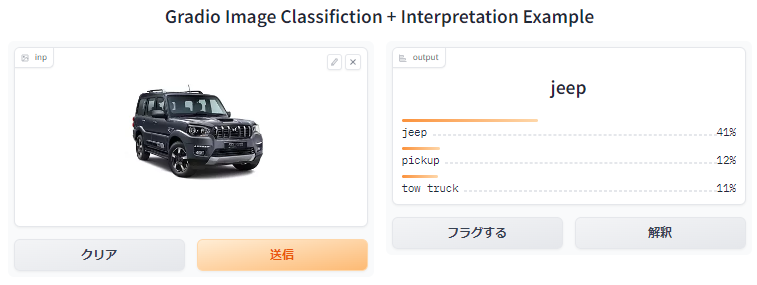

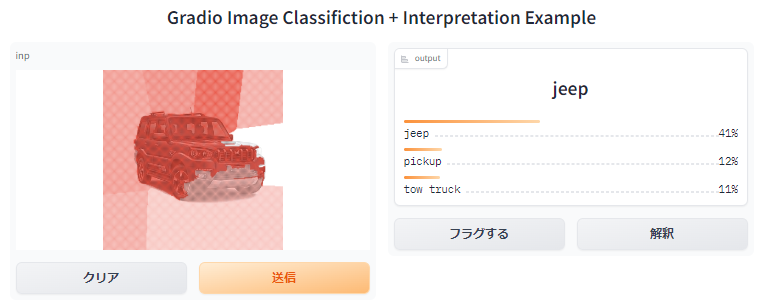

### Blocks

- Blocks allow you to build web applications that combine markdown, HTML, buttons, and interactive components.
- gr.Blocks()

In [ ]:
import gradio as gr


def flip_text(x):
    return x[::-1]


demo = gr.Blocks()

with demo:
    gr.Markdown(
        """
    # Flip Text!
    Start typing below to see the output.
    """
    )
    input = gr.Textbox(placeholder="Flip this text")
    output = gr.Textbox()

    input.change(fn=flip_text, inputs=input, outputs=output)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

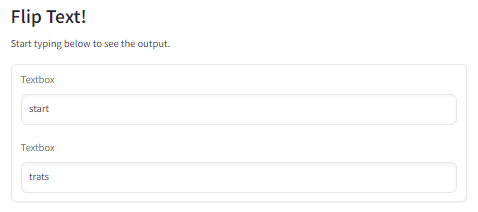

Controlling Layout:
- Row()

In [ ]:
with gr.Blocks() as demo:
    with gr.Row():
        input = gr.Textbox(placeholder="Flip this text")
        output = gr.Textbox()

    with gr.Row():
        btn1 = gr.Button("Button 1")
        btn2 = gr.Button("Button 2")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

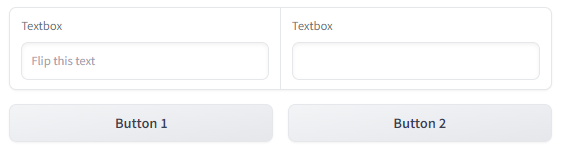

equal_height

In [ ]:
with gr.Blocks() as demo:
    with gr.Row().style(equal_height=True):
        textbox1 = gr.Textbox(lines=4)
        textbox2 = gr.Textbox()
        btn1 = gr.Button("Button 1")

demo.launch()

<ipython-input-9-cf636c26c990>:2: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  with gr.Row().style(equal_height=True):


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

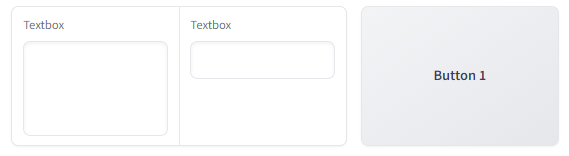

scale

In [ ]:
with gr.Blocks() as demo:
    with gr.Row():
        btn0 = gr.Button("Button 0", scale=0)
        btn1 = gr.Button("Button 1", scale=1)
        btn2 = gr.Button("Button 2", scale=2)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

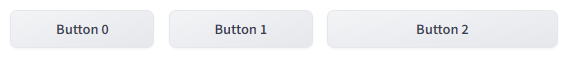

Tab
- gr.Tabs()
- gr.TabItem()
- gr.Row():

In [ ]:
import numpy as np
import gradio as gr

demo = gr.Blocks()


def flip_text(x):
    return x[::-1]


def flip_image(x):
    return np.fliplr(x)


with demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tabs():
        with gr.TabItem("Flip Text"):
            with gr.Row():
                text_input = gr.Textbox()
                text_output = gr.Textbox()
            text_button = gr.Button("Flip")
        with gr.TabItem("Flip Image"):
            with gr.Row():
                image_input = gr.Image()
                image_output = gr.Image()
            image_button = gr.Button("Flip")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

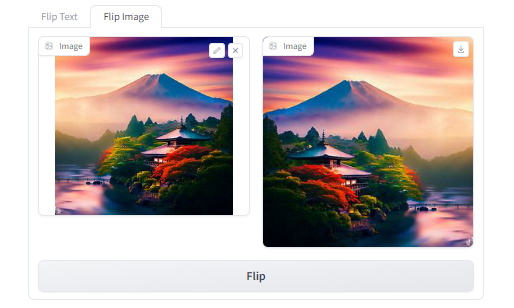

### input and output in same component

In [ ]:
import gradio as gr

api = gr.Interface.load("huggingface/EleutherAI/gpt-j-6B")


def complete_with_gpt(text):
    # Use the last 50 characters of the text as context
    return text[:-50] + api(text[-50:])


with gr.Blocks() as demo:
    textbox = gr.Textbox(placeholder="Type here and press enter...", lines=4)
    btn = gr.Button("Generate")

    btn.click(complete_with_gpt, textbox, textbox)

demo.launch()

<ipython-input-4-fb1038e34563>:3: GradioDeprecationWarning: gr.Interface.load() will be deprecated. Use gr.load() instead.
  api = gr.Interface.load("huggingface/EleutherAI/gpt-j-6B")


Fetching model from: https://huggingface.co/EleutherAI/gpt-j-6B
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

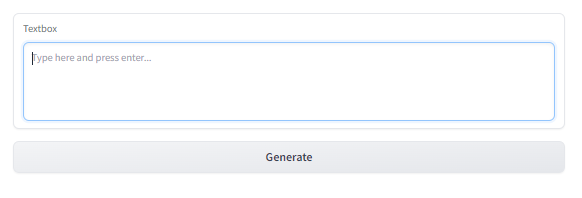

### multi-step

- automatic-speech-recognition -> facebook/wav2vec2-base-960h

In [ ]:
from transformers import pipeline

import gradio as gr

asr = pipeline("automatic-speech-recognition", "facebook/wav2vec2-base-960h")
classifier = pipeline("text-classification")

def speech_to_text(mic=None, file=None):
    if mic is not None:
        audio = mic
    elif file is not None:
        audio = file
    else:
        return "You must either provide a mic recording or a file"
    text = asr(audio)["text"]
    return text


def text_to_sentiment(text):
    return classifier(text)[0]["label"]


demo = gr.Blocks()

with demo:
    audio_file = [
        gr.Audio(source="microphone",
                 type="filepath",
                 optional=True),
        gr.Audio(source="upload",
                 type="filepath",
                 optional=True),
    ]
    text = gr.Textbox()
    label = gr.Label()

    b1 = gr.Button("Recognize Speech")
    b2 = gr.Button("Classify Sentiment")

    b1.click(speech_to_text, inputs=audio_file, outputs=text)
    b2.click(text_to_sentiment, inputs=text, outputs=label)

demo.launch()

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
<ipython-input-7-f31404644f33>:27: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Audio(source="microphone",
<ipython-input-7-f31404644f33>:30: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Audio(source="upload",


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

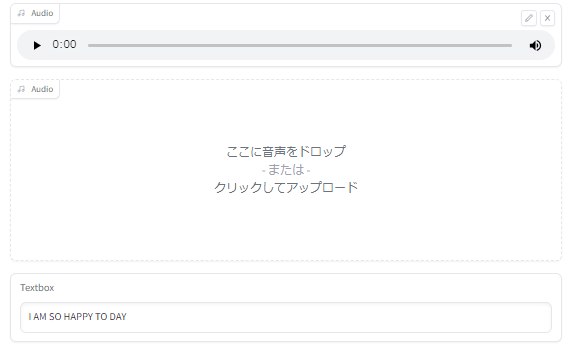

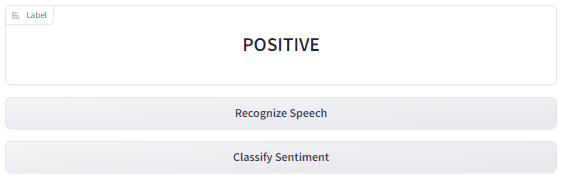

### Updating Component Properties


In [ ]:
import gradio as gr


def change_textbox(choice):
    if choice == "short":
        return gr.Textbox.update(lines=2, visible=True)
    elif choice == "long":
        return gr.Textbox.update(lines=8, visible=True)
    else:
        return gr.Textbox.update(visible=False)


with gr.Blocks() as block:
    radio = gr.Radio(
        ["short", "long", "none"], label="What kind of essay would you like to write?"
    )
    text = gr.Textbox(lines=2, interactive=True)

    radio.change(fn=change_textbox, inputs=radio, outputs=text)
    block.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

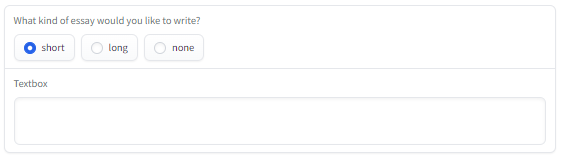